# Demo 1: Basic Image Manipulation in Python

If using google colab, check version of scikit-image.  If it isn't 0.22.0, install that version.


In [1]:
import skimage
print(skimage.__version__)

!pip3 install "scikit-image==0.22.0"

0.24.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


google colab: Mount google drive for saving images - this is optional

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Import packages we will need for image analysis.

In [1]:
!pip install scikit-image==0.19.3
import numpy as np
from skimage import data, io, color, filters, morphology, util
from skimage import exposure, measure, feature, segmentation, restoration
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import scipy.ndimage as ndi

Cat image is loaded as a numpy array. (Cat image is an example image provided by scikit-image.)

***Question: What is the image type of the cat image?***

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
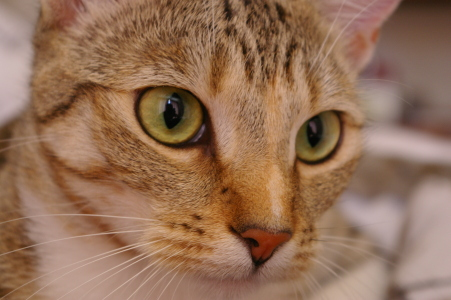

In [2]:
cat_image = data.chelsea()
cat_image

Use imshow from matplotlib to display data as an image

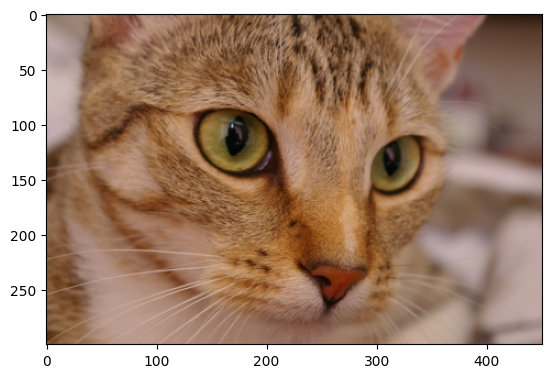

In [3]:
plt.imshow(cat_image)
plt.show()

In [4]:
# Some basic information
print("image shape (height, width, colors):", cat_image.shape)
print("image type:", cat_image.dtype)
print("Min/max of image pixels:", cat_image.min(), cat_image.max())
print("RGB values for pixel in upper left corner:", cat_image[0][0])
print("Min/max of red channel pixels:", cat_image[:,:,0].min(), cat_image[:,:,0].max())

image shape (height, width, colors): (300, 451, 3)
image type: uint8
Min/max of image pixels: 0 231
RGB values for pixel in upper left corner: [143 120 104]
Min/max of red channel pixels: 2 215


Slice (crop) image (rows first, counting down from the top)

[rows, columns, colors]

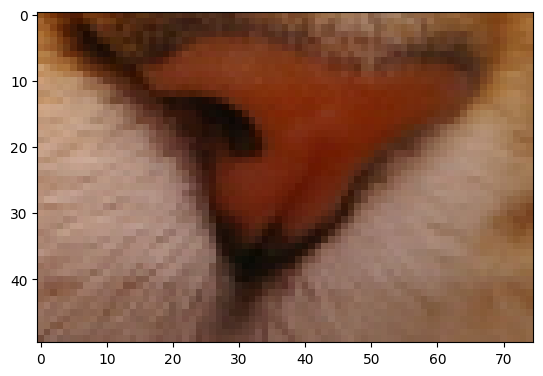

In [5]:
cat_nose=cat_image[225:275,225:300,:]
plt.imshow(cat_nose)
plt.show()

Convert to greyscale: rgb to grey converts rgb values to luminance (brightness)

Y = 0.2125 R + 0.7154 G + 0.0721 B (floating point 0-1)

image shape: (height, width): (300, 451)
image type: float64


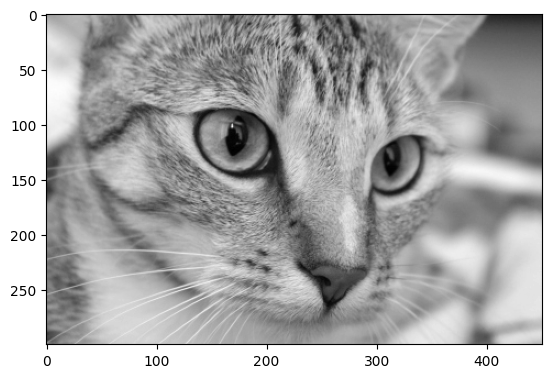

In [6]:
cat_image_gray=color.rgb2gray(cat_image)
plt.imshow(cat_image_gray, cmap="gray")
print("image shape: (height, width):", cat_image_gray.shape)
print("image type:", cat_image_gray.dtype)


Intensity Histograms

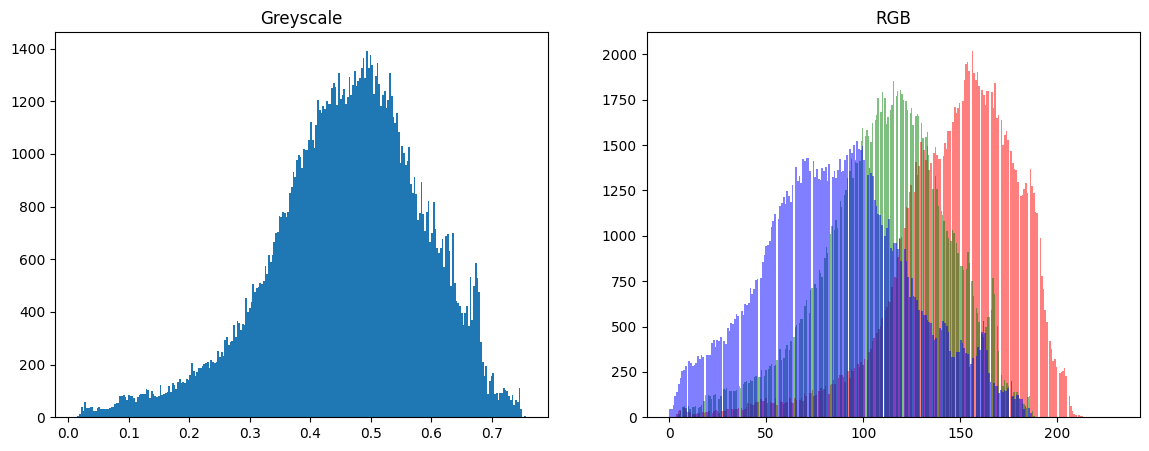

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Greyscale")
plt.hist(cat_image_gray.ravel(), bins=256, )

plt.subplot(1,2,2)
plt.title("RGB")
plt.hist(cat_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5)
plt.hist(cat_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5)
plt.hist(cat_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5)

plt.show()

Extract data from color channels of a fluorescence microscopy image (dSTORM Image / Marta Perez-Hernandez)

use imread to read in images from files

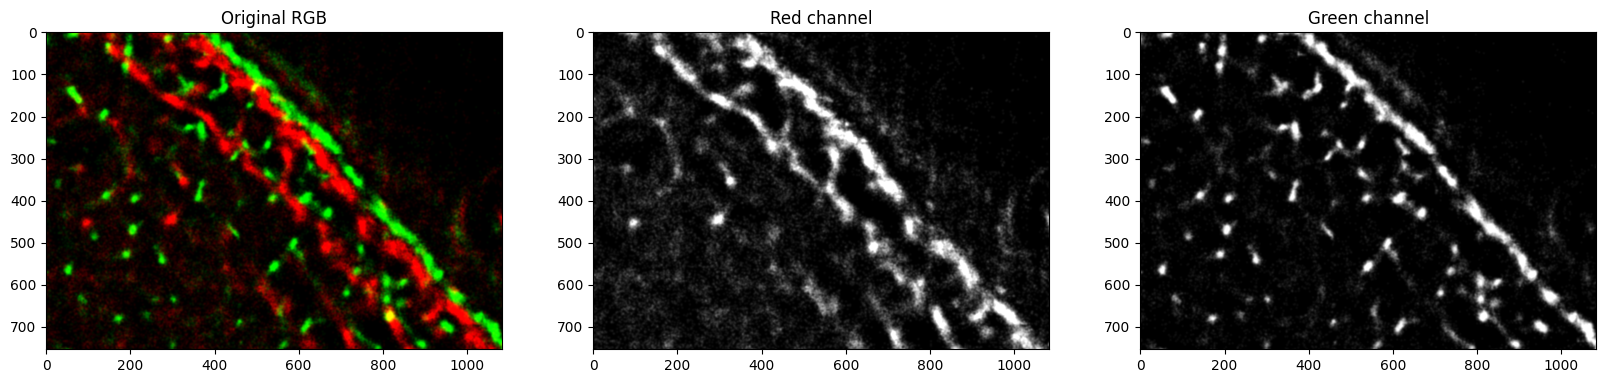

In [8]:
dStorm_img=io.imread("https://raw.githubusercontent.com/FenyoLab/ImageAnalysisClass/main/spool_12_Reconstruction_smoothed.tif")

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.title("Original RGB")
plt.imshow(dStorm_img)

plt.subplot(1,3,2)
plt.title("Red channel")
plt.imshow(dStorm_img[:,:,0], cmap="gray")

plt.subplot(1,3,3)
plt.title("Green channel")
plt.imshow(dStorm_img[:,:,1], cmap="gray")
plt.show()

Immunohistochemistry (Haematoxylin-Eosin-DAB (HED)) - separation of
color information stored in RGB channels does not separate based on the staining

Goal is to separate the immunohistochemical (IHC) staining from the hematoxylin counterstaining

Image shape: (512, 512, 3)
Image min/max: 0 255


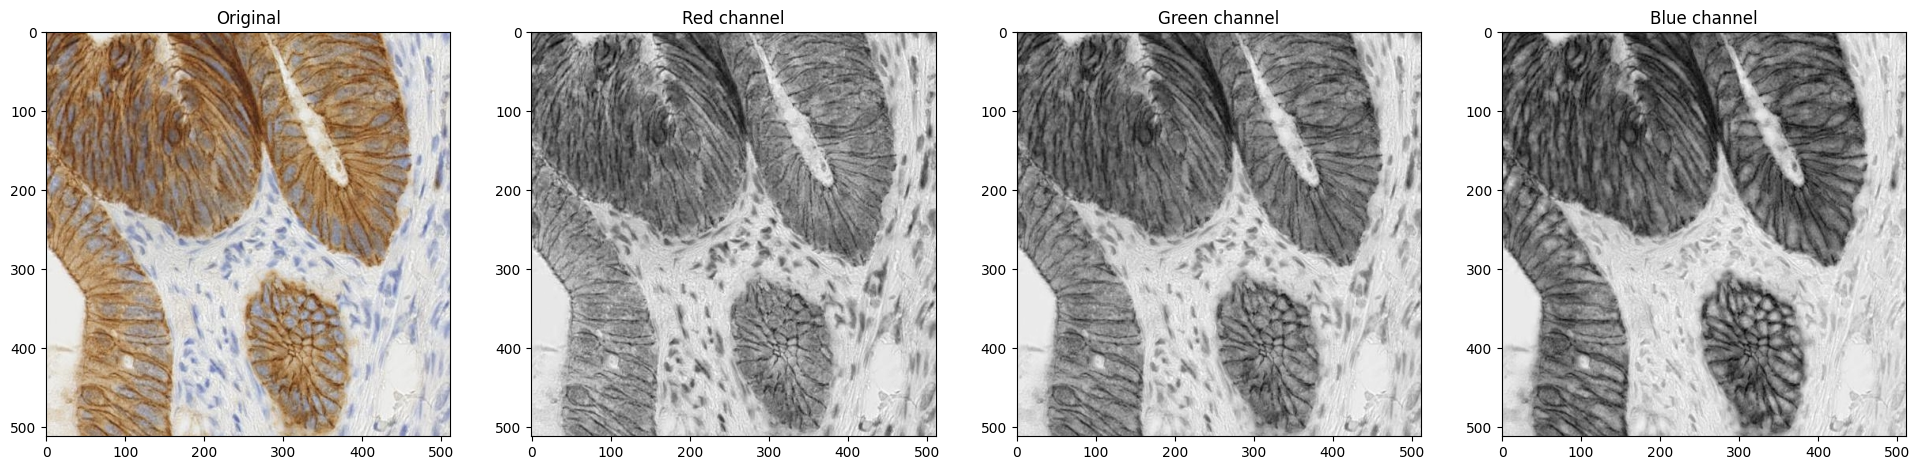

In [9]:
from skimage.color import rgb2hed, hed2rgb
ihc_rgb = data.immunohistochemistry()

# Image shape
print(f"Image shape: {ihc_rgb.shape}")

# Image intensity
print("Image min/max:", ihc_rgb.min(), ihc_rgb.max())

# Show original image, separate channels in RGB color space
plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(ihc_rgb)

plt.subplot(1,4,2)
plt.title("Red channel")
plt.imshow(ihc_rgb[:,:,0], cmap="gray")

plt.subplot(1,4,3)
plt.title("Green channel")
plt.imshow(ihc_rgb[:,:,1], cmap="gray")

plt.subplot(1,4,4)
plt.title("Blue channel")
plt.imshow(ihc_rgb[:,:,2], cmap='gray')
plt.show()

Use scikit-image package to apply color "deconvolution" operation

RGB to Haematoxylin-Eosin-DAB (HED) color space conversion:
Deconvolve the color information acquired with red-green-blue (RGB) cameras to calculate the contribution of each of the stains based on stain-specific RGB absorption.

Notice that the image is difficult to visualize in the HED color space: due to the mathematical operation on the pixel values, the data type of the image has changed to floating point and is not between 0-1 (imshow will clip values outside of this range)

Image (Hem) min/max: 0.0 0.10816526193004518
Image (Eos - empty) min/max: 0.0 0.003422504179119348
Image (DAB) min/max: 0.0 1.5152941475988386


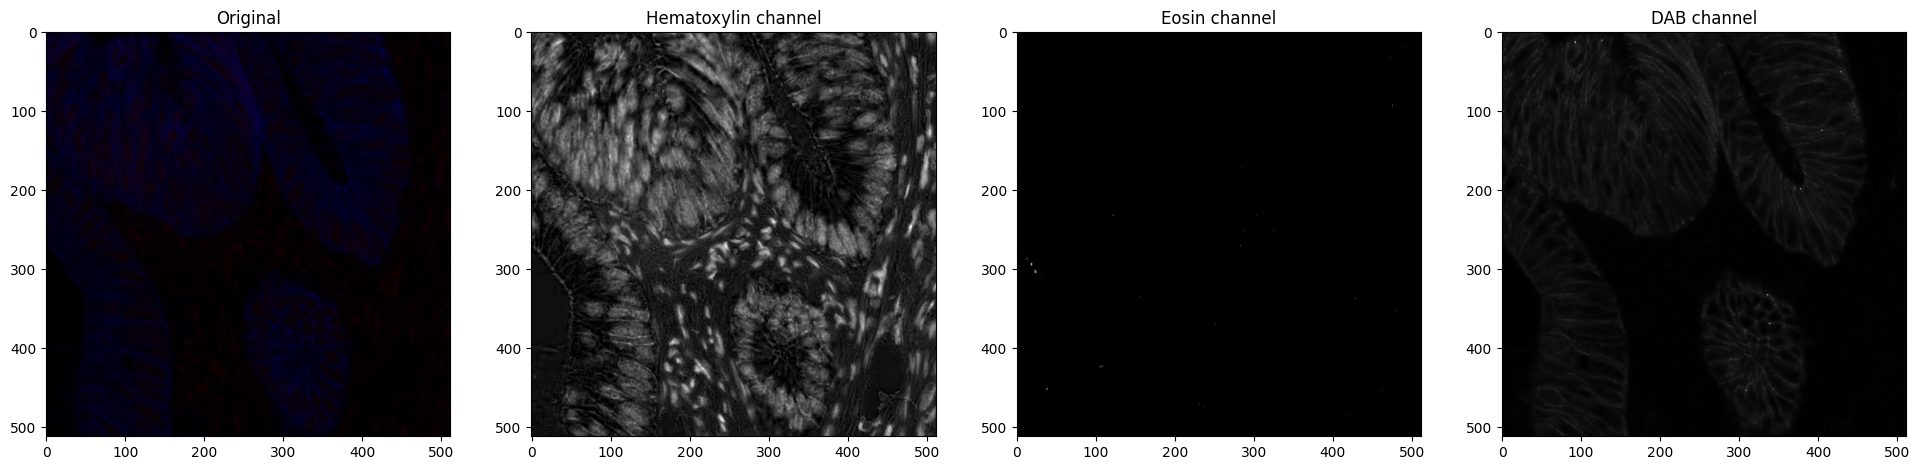

In [10]:
# Extract Hematoxylin, Eosin and DAB color contributions from the RGB channels

ihc_hed = rgb2hed(ihc_rgb)

# Show each channel separately: Hematoxylin, Eosin and DAB
plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(ihc_hed[:,:,])

plt.subplot(1,4,2)
plt.title("Hematoxylin channel")
print("Image (Hem) min/max:", ihc_hed[:,:,0].min(), ihc_hed[:,:,0].max())
plt.imshow(ihc_hed[:,:,0], cmap="gray")

plt.subplot(1,4,3)
plt.title("Eosin channel")
print("Image (Eos - empty) min/max:", ihc_hed[:,:,1].min(), ihc_hed[:,:,1].max())
plt.imshow(ihc_hed[:,:,1], cmap="gray")

plt.subplot(1,4,4)
plt.title("DAB channel")
print("Image (DAB) min/max:", ihc_hed[:,:,2].min(), ihc_hed[:,:,2].max())
plt.imshow(ihc_hed[:,:,2], cmap="gray")
plt.show()



Convert extracted stain information back to RGB for a better display.

For better visualization, we can convert each channel of the HED image back to RGB color space, after deconvolution.  So, we extract/separate the H,E,D contributions from the RGB channels of the original image, and then place each of H,E,D into a separate RGB image.

This is a good example of manipulation of images using numpy ndarray operations

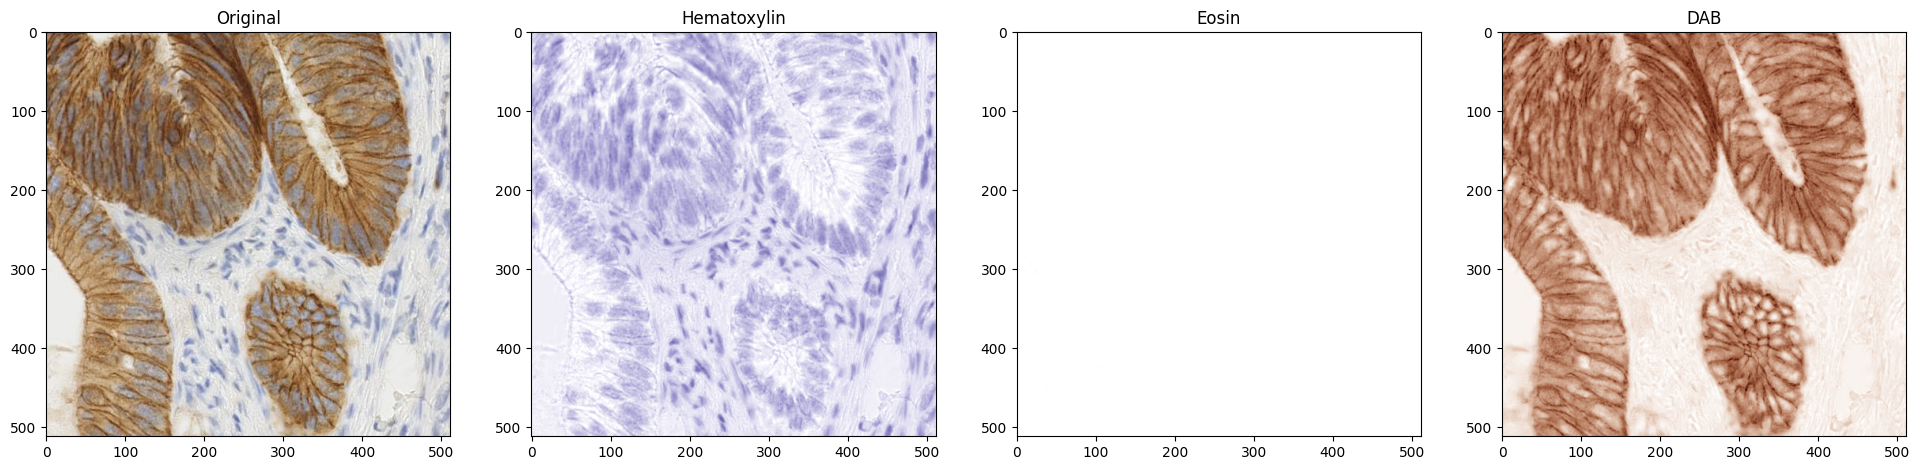

In [11]:
plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(ihc_rgb)

# Hematoxylin (purple/blue): the first channel of the HED image
plt.subplot(1,4,2)
plt.title("Hematoxylin")

# first, make an array of all zeros that has same shape as a single channel of the original image
blank_ch = np.zeros_like(ihc_hed[:, :, 0])

# np.stack will combine the channels into RGB format (axis=-1 means stack on the last (color) dimension)
# here, we stack the first channel of the HED image and 2 blank channels and convert to RGB
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], blank_ch, blank_ch), axis=-1))

plt.imshow(ihc_h)

# Same as above, for the other channels:

# Eosin (pink) - no stain for Eosin in this example
plt.subplot(1,4,3)
plt.title("Eosin")
ihc_e = hed2rgb(np.stack((blank_ch, ihc_hed[:, :, 1], blank_ch), axis=-1))
plt.imshow(ihc_e)

# DAB (brown)
plt.subplot(1,4,4)
plt.title("DAB")
ihc_d = hed2rgb(np.stack((blank_ch, blank_ch, ihc_hed[:, :, 2]), axis=-1))
plt.imshow(ihc_d)
plt.show()

# Demo 2: Filters, Background subtraction, and Contrast Enhance

Rank filters

5x5 square: 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
disk of radius 5: 
 [[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


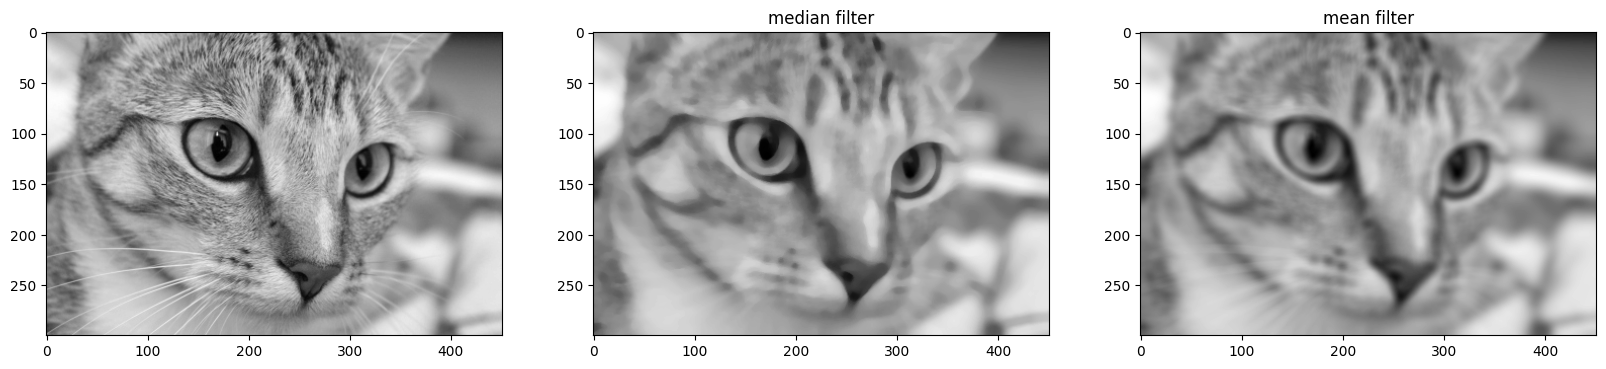

In [12]:
# Structuring element: can be a square or disk, notice the differences
# Size determines "how much" smoothing
size=5

el=morphology.square(size)
print("5x5 square: \n", el)

el=morphology.disk(size)
print("disk of radius 5: \n", el)

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(cat_image_gray, cmap='gray')

plt.subplot(1,3,2)
plt.title("median filter")
cat_filt_med=filters.rank.median(img_as_ubyte(cat_image_gray), footprint=el)
plt.imshow(cat_filt_med, cmap='gray')

plt.subplot(1,3,3)
plt.title("mean filter")
cat_filt_mean=filters.rank.mean(img_as_ubyte(cat_image_gray), footprint=el)
plt.imshow(cat_filt_mean, cmap='gray')

plt.show()

 **Activity**

 *Apply a gaussian filter to the greyscale cat image.*

(1) Try different values for sigma to see the results

 *When you you apply the gaussian filter to the color image: what happens?*

(2) What is the difference between the 2nd and 3rd images below?

* Check: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


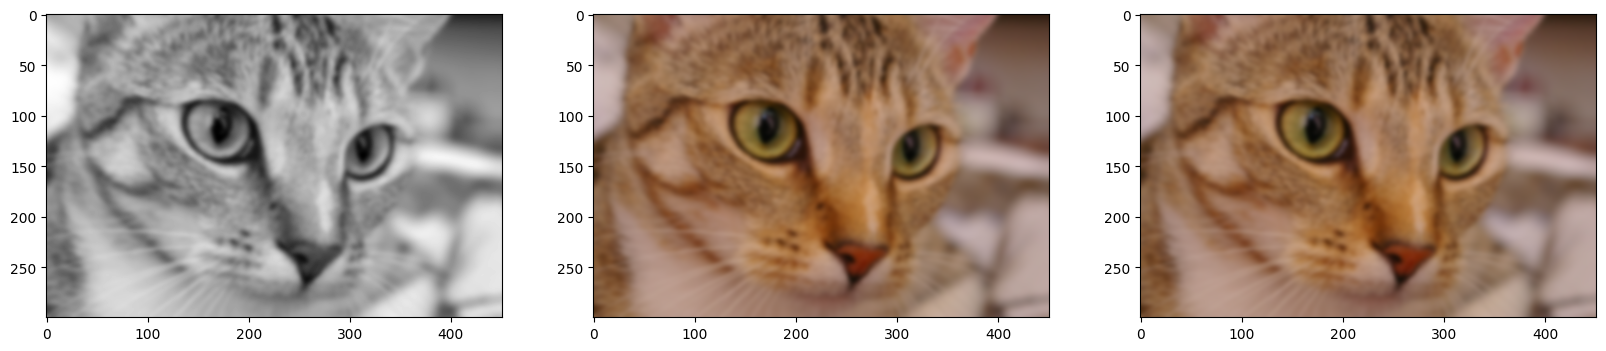

In [13]:
plt.figure(figsize=(20,30))

# Greyscale image: try different sigma values
plt.subplot(1,3,1)
cat_filter_gauss=filters.gaussian(cat_image_gray, sigma=2)
plt.imshow(cat_filter_gauss, cmap='gray')

# Color image: what is the difference between the two?
plt.subplot(1,3,2)
cat_filter_gauss_rgb1=filters.gaussian(cat_image, sigma=2, channel_axis=None)
plt.imshow(cat_filter_gauss_rgb1)

plt.subplot(1,3,3)
cat_filter_gauss_rgb2=filters.gaussian(cat_image, sigma=2, channel_axis=2)
plt.imshow(cat_filter_gauss_rgb2)

# Hint for Question #2 above:
#cat_filter_gauss_rgb3=ndi.gaussian_filter(cat_image, [2,2,2], mode='nearest', cval=0, truncate=4.0)
#cat_filter_gauss_rgb3=ndi.gaussian_filter(cat_image, [2,2,0], mode='nearest', cval=0, truncate=4.0)


Kernel: Sharpening

In [14]:
def make_sharpen_kernel(amount=1):
  """Make 3x3 sharpening kernal"""
  source=np.zeros(shape=(3,3))
  source[1][1]=1
  edge_det=np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]])
  return source+(edge_det*amount)

In [15]:
print(make_sharpen_kernel())
print()
print(make_sharpen_kernel(2))

[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]

[[ 0. -2.  0.]
 [-2.  9. -2.]
 [ 0. -2.  0.]]


Convolve the image with the kernal

***Question: why are some pixels in the center of the eye white?***

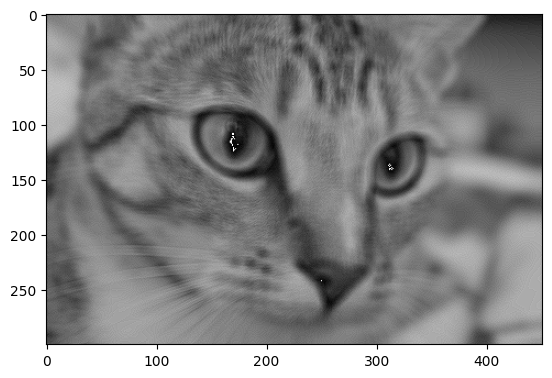

In [16]:
sharpen=ndi.convolve(cat_filt_mean, make_sharpen_kernel(3), )
plt.imshow(sharpen, cmap="gray")
plt.show()

Use "output" parameter with an array of type int16 to allow values from -32768 to 32767

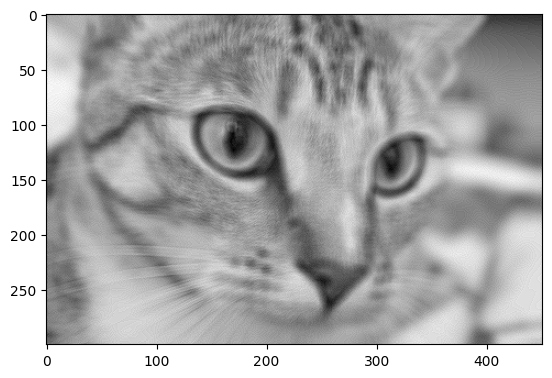

In [17]:
sharpen=np.zeros(cat_filt_mean.shape, dtype='int16')
ndi.convolve(cat_filt_mean, make_sharpen_kernel(3), output=sharpen)
plt.imshow(sharpen, cmap="gray")
plt.show()

img_as_ubyte will convert back to original dtype by setting all negative pixels to 0.

Intensity range:  -12 199
Intensity range:  0 199


/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int16 to uint8 without scaling because max value 199 fits in uint8
  return _convert(image, np.uint8, force_copy)


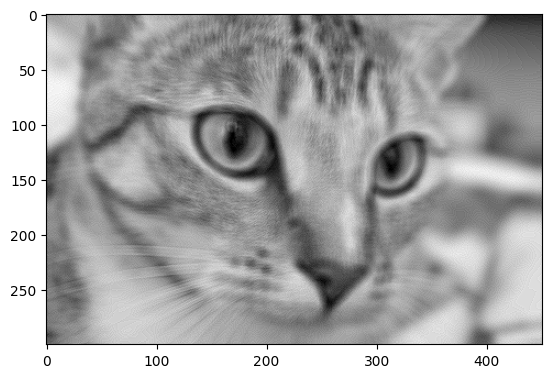

In [18]:
print("Intensity range: ", sharpen.min(), sharpen.max())
sharpen_8bit = util.img_as_ubyte(sharpen)
print("Intensity range: ", sharpen_8bit.min(), sharpen_8bit.max())
plt.imshow(sharpen_8bit, cmap="gray")
plt.show()


Edge Detection

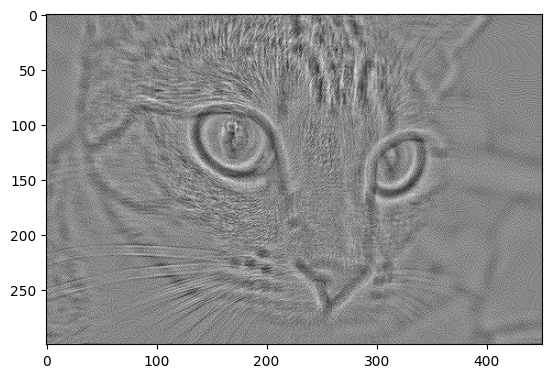

In [19]:
edge=np.zeros(cat_filt_mean.shape, dtype='int16')
ndi.convolve(cat_filt_mean, np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]]), output=edge)
plt.imshow(edge, cmap="gray")
plt.show()


How does the filter affect the image intensities?

Sharpen results in a wider range of values than Edge

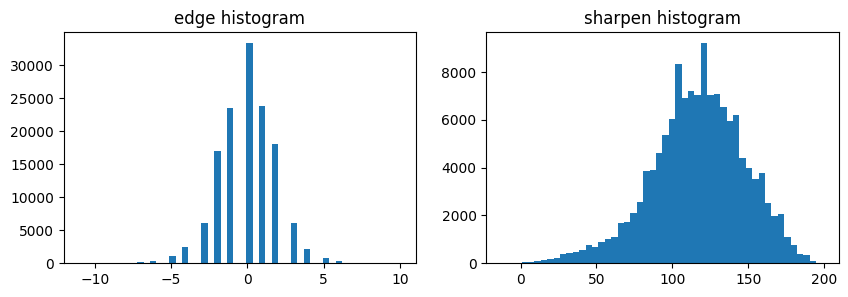

In [20]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("edge histogram")
ret=plt.hist(edge.ravel(), bins=50)

plt.subplot(1,2,2)
plt.title("sharpen histogram")
ret=plt.hist(sharpen.ravel(), bins=50)


Unsharp mask: *radius* for blurring, *amount* for sharpening - adjust for different effects

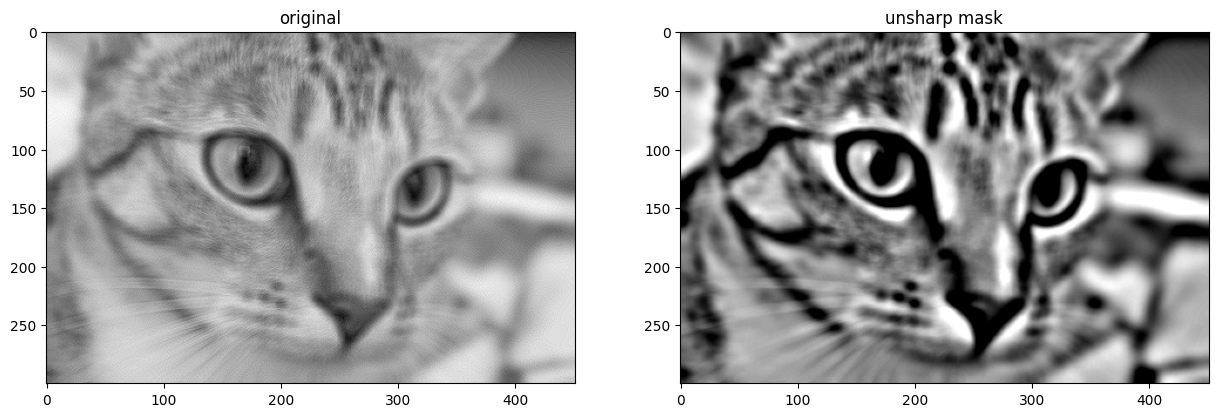

In [21]:
# Unsharp mask
unsharp_mask = filters.unsharp_mask(cat_filt_mean, radius=10, amount=4)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(sharpen, cmap='gray')

plt.subplot(1,2,2)
plt.title("unsharp mask")
plt.imshow(unsharp_mask, cmap="gray")

plt.show()

Saving an image to a file (imsave) - convert to a readable format

Result of unsharp mask is a float 64 bit image - we convert it to unsigned 8bit before saving

If we do not convert, it will be hard to visualize the image on a computer screen.

** Do not use unsharp_mask.astype('uint8'): this will not preserve the image intensity range correctly **

In [22]:
print(unsharp_mask.dtype)
#io.imsave("/content/drive/My Drive/Colab Data/cat_unsharp.tif", unsharp_mask)
io.imsave("cat_unsharp.tif", unsharp_mask)

unsharp_mask_8bit=util.img_as_ubyte(unsharp_mask)  # do not use: unsharp_mask.astype('uint8')
print(unsharp_mask_8bit.dtype)
#io.imsave("/content/drive/My Drive/Colab Data/cat_unsharp_8_bit.tif", unsharp_mask_8bit)
io.imsave("cat_unsharp_8_bit.tif", unsharp_mask_8bit)

float64
uint8


Rolling ball background subtraction

Read an image from a URL (or local file): imread

***Activity: can you try different values for the radius to see what works best***

*** This algorithm can be slow for a large radius ***

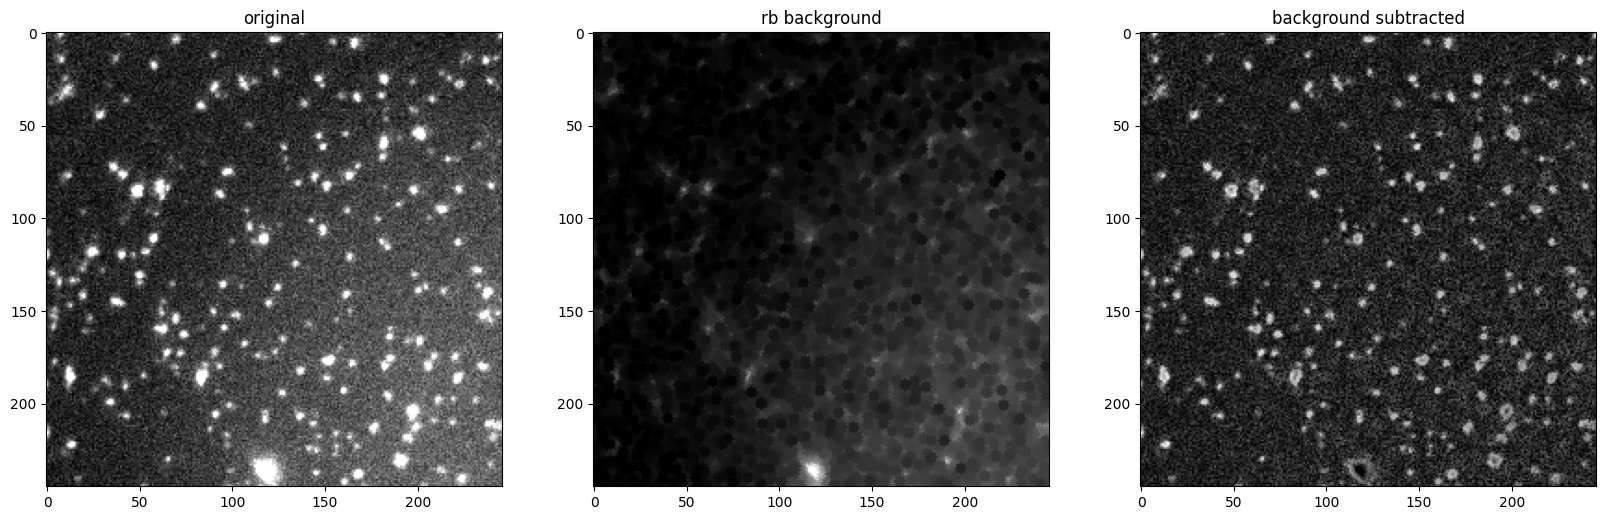

In [23]:
fl_img=io.imread("https://raw.githubusercontent.com/FenyoLab/ImageAnalysisClass/main/img13_cropped.gif")
fl_img = fl_img.squeeze() # remove axis 0, this image reads in by skimage with an extra axis


background = restoration.rolling_ball(fl_img, radius=3)
# >= 100 might take a while to run

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(fl_img, cmap='gray')

plt.subplot(1,3,2)
plt.title("rb background")
plt.imshow(background, cmap='gray')

plt.subplot(1,3,3)
plt.title("background subtracted")
plt.imshow(fl_img-background, cmap='gray')

plt.show()

Contrast Adjustments

Image courtesy Nazario Bosco: Blue channel only, DAPI (fluorescent DNA stain)

(960, 1280) uint8


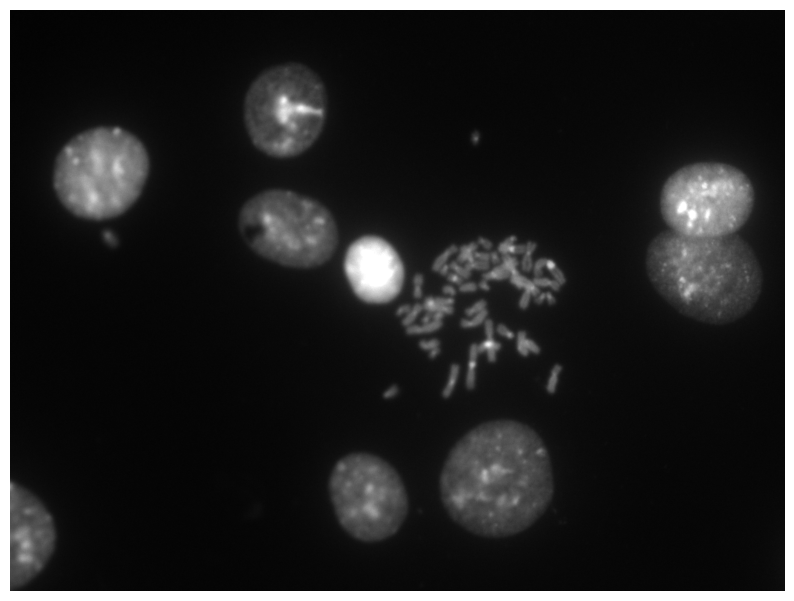

In [24]:
nuclei_image=io.imread("https://raw.githubusercontent.com/FenyoLab/ImageAnalysisClass/main/45_DAPI.tif")
print(nuclei_image.shape, nuclei_image.dtype)

plt.figure(figsize=(10,10))
plt.imshow(nuclei_image, cmap="gray")
plt.axis('off')

plt.show()

Contrast Enhance: Histogram Equalization

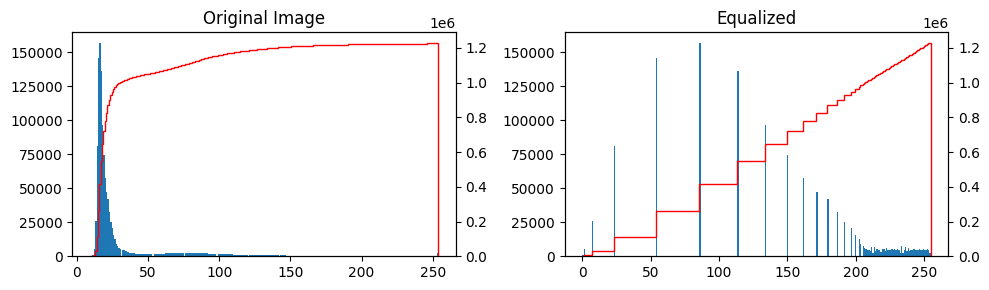

In [25]:
plt.figure(figsize=(10,3))

# Original image: intensity histogram with CDF (cumulative distribution function) in red
plt.subplot(1,2,1)
plt.title("Original Image")
ret=plt.hist(nuclei_image.ravel(), bins=256)
ax = plt.gca().twinx()
ret=ax.hist(nuclei_image.ravel(), bins=256, cumulative=True, histtype='step', color='red')

# Equalize:
img_eq = util.img_as_ubyte(exposure.equalize_hist(nuclei_image))

# After histogram equalization:
plt.subplot(1,2,2)
plt.title("Equalized")
ret=plt.hist(img_eq.ravel(), bins=256)
ax = plt.gca().twinx()
ret=plt.hist(img_eq.ravel(), bins=256, cumulative=True, histtype='step', color='red')

plt.tight_layout()
plt.show()

Contrast Equalization is too extreme for this image

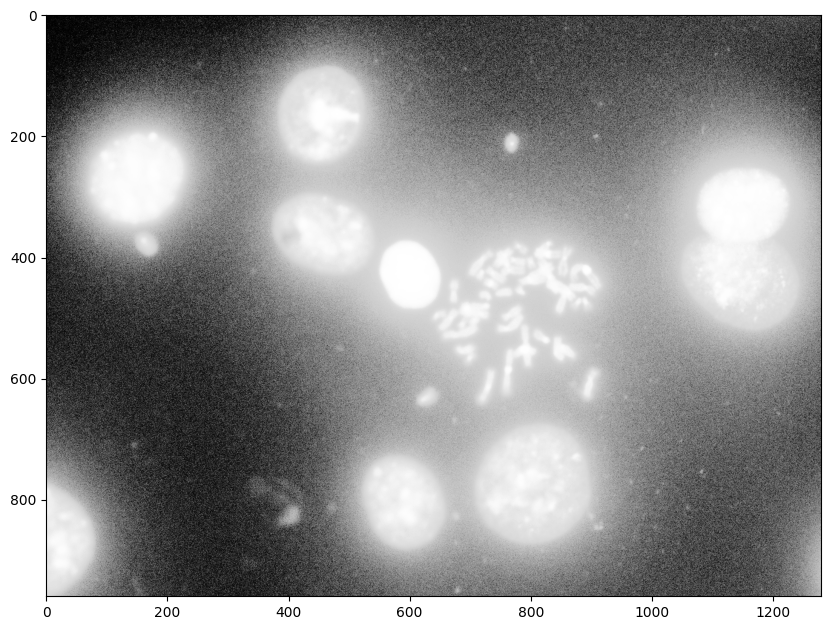

In [26]:

plt.figure(figsize=(10,10))
plt.imshow(img_eq, cmap="gray")
plt.show()

CLAHE - contrast limited adaptive histogram equalization

***Activity: try different values for kernel_size and clip_limit***

***What happens when each is changed?  Why?***

***(Can you make the CLAHE image look like the image above?)***

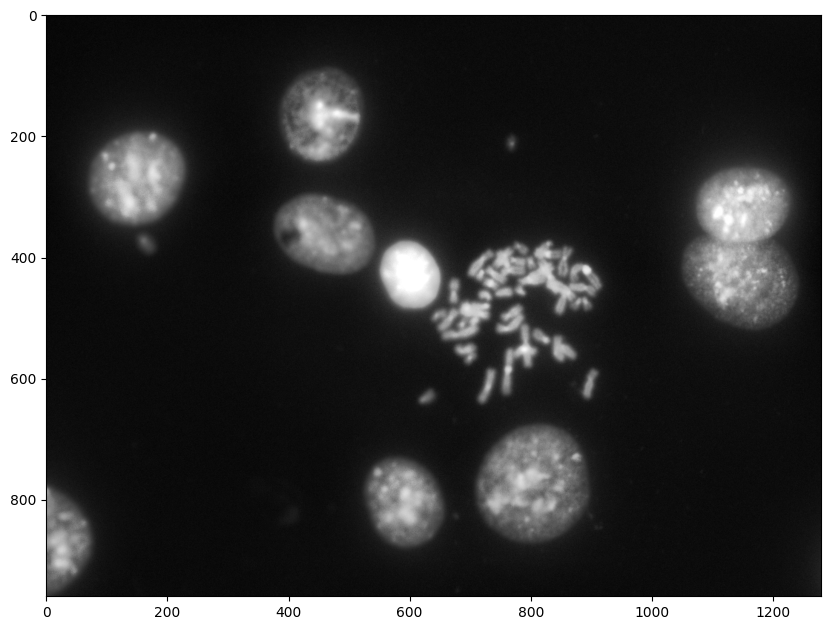

In [27]:
img_eq_adapt = exposure.equalize_adapthist(nuclei_image)

# Try uncommmenting this line and adjusting the parameters:
#img_eq_adapt = exposure.equalize_adapthist(nuclei_image, kernel_size=?, clip_limit=?)

plt.figure(figsize=(10,10))
plt.imshow(img_eq_adapt, cmap="gray")
plt.show()